# Pandas and EDA II

In this notebook, we will extend our use of the Pandas library in exploring datasets.  We want to add the ability to filter and subset data based on logical criteria.  


**OBJECTIVES**:

- Load data using `Pandas` in a variety of formats.
- Describe data types and explain characteristics of data set at a descriptive level
- Subset rows and columns based on numerical features
- Subset rows and columns based on categorical features


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
occ = pd.read_csv('data/occupations.csv')

In [3]:
occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [4]:
occ.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [5]:
occ.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [6]:
occ.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [7]:
pd.to_numeric(occ.zip_code)

ValueError: Unable to parse string "T8H1N" at position 73

In [8]:
occ.iloc[73]

user_id              74
age                  39
gender                M
occupation    scientist
zip_code          T8H1N
Name: 73, dtype: object

In [9]:
occ.replace('T8H1N', '00001', inplace=True)

In [10]:
pd.to_numeric(occ.zip_code)

ValueError: Unable to parse string "V3N4P" at position 144

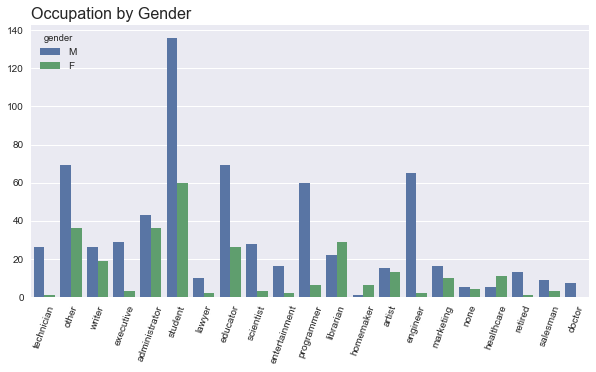

In [11]:
plt.figure(figsize = (10, 5))
sns.countplot(occ.occupation, hue = occ.gender)
plt.xticks(rotation = 70)
plt.xlabel('')
plt.ylabel('')
plt.title('Occupation by Gender', loc = 'left', fontsize = 16);

### Filtering Data

Now, we will examine how to filter data in a way that returns a `DataFrame`.  This means that once filtered, we can apply our usual operations including plots.  For example, suppose we wanted to look at just the librarians.  We can see whether or not this is true, and then we can apply this as a mask to our original `DataFrame`, creating a subset of the original data as a `DataFrame`.

In [11]:
#this means the first ten rows of our datafram do not contain librarians
(occ.occupation == 'librarian').head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: occupation, dtype: bool

In [12]:
#see the top of a subset dataframe
occ[occ.occupation == 'librarian'].head()

,user_id,age,gender,occupation,zip_code
18,19,40,M,librarian,02138
26,27,40,F,librarian,30030
42,43,29,F,librarian,20854
55,56,25,M,librarian,46260
87,88,49,F,librarian,11701


In [13]:
#save this as a new dataframe named librarians
librarians = occ[occ.occupation == 'librarian']

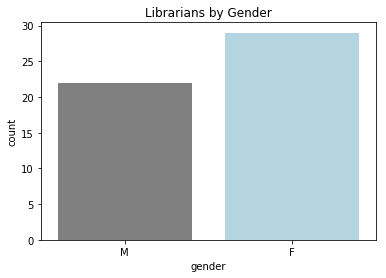

In [14]:
#use the dataframe just like we have before
sns.countplot(librarians.gender, palette=['grey', 'lightblue'])
plt.title('Librarians by Gender');

### Logical Combinations

At a higher level, we are using comparisons to create subsets of our original data.  In Python we have the following comparison syntax:

- `>`: Greater Than
- `<`: Less Than
- `>=`: Greater Than or Equal To
- `<=`: Less than or Equal To
- `==`: Congruent
- `!=`: Not Equal To

We can combine these operations with **and**/**or** operations.  For example if we wanted librarians who were under the age of 40, we want:

```python
occupation == 'librarian'
age < 40
```

This would be put together with the **and** operation, implemented with `&`. 

In [15]:
occ[(occ.occupation == 'librarian' ) & (occ.age < 40)].head()

,user_id,age,gender,occupation,zip_code
42,43,29,F,librarian,20854
55,56,25,M,librarian,46260
183,184,37,M,librarian,76013
213,214,26,F,librarian,11231
219,220,30,M,librarian,78205


In [16]:
young_librarians = (occ.occupation == 'librarian' ) & (occ.age < 40)

In [17]:
occ[young_librarians].head()

,user_id,age,gender,occupation,zip_code
42,43,29,F,librarian,20854
55,56,25,M,librarian,46260
183,184,37,M,librarian,76013
213,214,26,F,librarian,11231
219,220,30,M,librarian,78205


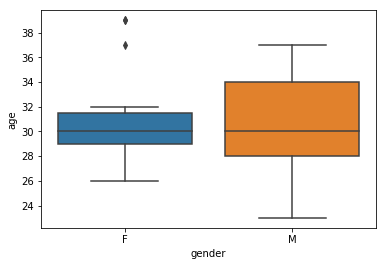

In [18]:
sns.boxplot( occ[young_librarians].gender, occ[young_librarians].age)

In [19]:
occ[young_librarians].groupby('gender').describe()

age                                                    user_id  \
       count       mean       std   min   25%   50%   75%   max   count   
gender                                                                    
F       15.0  31.000000  4.157609  26.0  29.0  30.0  31.5  39.0    15.0   
M       11.0  30.545455  4.367233  23.0  28.0  30.0  34.0  37.0    11.0   

                                                                  
              mean         std   min    25%    50%    75%    max  
gender                                                            
F       394.133333  239.321621  43.0  261.0  338.0  458.5  895.0  
M       518.363636  288.615756  56.0  277.0  527.0  797.0  843.0

In [21]:
occ.groupby(['occupation', 'gender']).describe()[:10]

age                                                  \
                     count       mean        std   min    25%   50%    75%   
occupation    gender                                                         
administrator F       36.0  40.638889  10.602298  22.0  33.00  38.5  49.25   
              M       43.0  37.162791  11.422472  21.0  28.00  35.0  46.50   
artist        F       13.0  30.307692   9.542751  19.0  21.00  30.0  36.00   
              M       15.0  32.333333   8.050436  20.0  26.00  32.0  39.00   
doctor        M        7.0  43.571429  12.501428  28.0  35.50  45.0  48.50   
educator      F       26.0  39.115385   9.003674  23.0  31.50  40.5  48.75   
              M       69.0  43.101449  10.755498  25.0  33.00  44.0  51.00   
engineer      F        2.0  29.500000   9.192388  23.0  26.25  29.5  32.75   
              M       65.0  36.600000  11.246944  22.0  28.00  36.0  43.00   
entertainment F        2.0  31.000000   9.899495  24.0  27.50  31.0  34.50   

                           user_id                                         \
                       max   count        mean         std    min     25%   
occupation    gender                                                        
administrator F       62.0    36.0  443.944444  284.320538   34.0  178.50   
              M       70.0    43.0  420.069767  281.650780    7.0  190.50   
artist        F       48.0    13.0  432.153846  345.109607   23.0  123.00   
              M       45.0    15.0  469.000000  313.686604   31.0  175.50   
doctor        M       64.0     7.0  533.714286  330.491913  138.0  275.00   
educator      F       51.0    26.0  454.730769  267.531315   15.0  215.00   
              M       63.0    69.0  471.492754  245.985331   13.0  295.00   
engineer      F       36.0     2.0  806.500000   28.991378  786.0  796.25   
              M       70.0    65.0  445.553846  258.156144   25.0  247.00   
entertainment F       38.0     2.0  780.000000   83.438600  721.0  750.50   

                                            
                        50%     75%    max  
occupation    gender                        
administrator F       438.5  695.00  922.0  
              M       394.0  707.00  940.0  
artist        F       410.0  782.00  920.0  
              M       433.0  824.50  865.0  
doctor        M       427.0  843.00  935.0  
educator      F       467.5  704.00  909.0  
              M       486.0  636.00  937.0  
engineer      F       806.5  816.75  827.0  
              M       435.0  638.00  934.0  
entertainment F       780.0  809.50  839.0

In [22]:
occ[(occ.occupation == 'librarian') | (occ.occupation == 'student')].head()

,user_id,age,gender,occupation,zip_code
8,9,29,M,student,01002
18,19,40,M,librarian,02138
26,27,40,F,librarian,30030
29,30,7,M,student,55436
31,32,28,F,student,78741


### Exploration I

Using the dataset provided, you should load and explore the different variables.  Provide information about the following:

- Distributions of quantitative variables
- Top beer drinking countries
- Bottom spirit serving continents
- Does it appear that as more wine is served, more beer is served?
- What are the top total consumers by continent?

In [23]:
drinks = pd.read_csv('data/eda_data/drinks.csv')

In [24]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
Unnamed: 0                      193 non-null int64
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 10.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109a04588>,
      dtype=object)

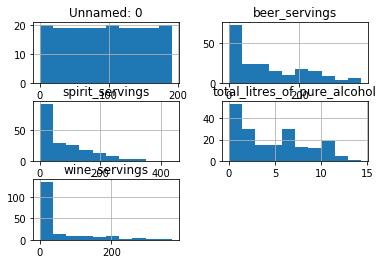

In [27]:
drinks.hist()

(array([72., 24., 23., 15., 10., 17., 15.,  8.,  3.,  6.]),
 array([  0. ,  37.6,  75.2, 112.8, 150.4, 188. , 225.6, 263.2, 300.8,
        338.4, 376. ]),
 <a list of 10 Patch objects>)

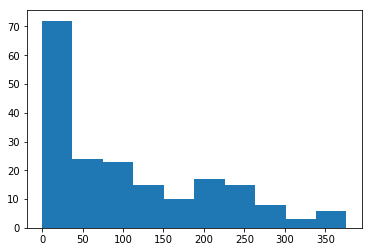

In [28]:
plt.hist(drinks.beer_servings)

In [31]:
drinks.nlargest(5, 'beer_servings')[['country', 'beer_servings']]

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343


In [29]:
drinks.shape

(193, 7)

In [30]:
193/4

48.25

In [32]:
drinks.beer_servings.describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

In [38]:
drinks[drinks.beer_servings > 188].sort_values('beer_servings', ascending = False)[['country', 'beer_servings']]

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343
135,Poland,343
188,Venezuela,333
81,Ireland,313
129,Palau,306
140,Romania,297


In [41]:
drinks.groupby('continent').sum()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,,
AF,4950,3258,866,862,159.4
AS,4796,1630,2677,399,95.5
EU,4022,8720,5965,6400,387.8
OC,1877,1435,935,570,54.1
SA,1046,2101,1377,749,75.7


In [61]:
for i in drinks.continent.unique():
    print(drinks[drinks.continent == i].nlargest(1, 'beer_servings'))

     Unnamed: 0             country  beer_servings  spirit_servings  \
141         141  Russian Federation            247              326   

     wine_servings  total_litres_of_pure_alcohol continent  
141             73                          11.5        AS  
    Unnamed: 0         country  beer_servings  spirit_servings  wine_servings  \
45          45  Czech Republic            361              170            134   

    total_litres_of_pure_alcohol continent  
45                          11.8        EU  
     Unnamed: 0  country  beer_servings  spirit_servings  wine_servings  \
117         117  Namibia            376                3              1   

     total_litres_of_pure_alcohol continent  
117                           6.8        AF  
Empty DataFrame
Columns: [Unnamed: 0, country, beer_servings, spirit_servings, wine_servings, total_litres_of_pure_alcohol, continent]
Index: []
     Unnamed: 0    country  beer_servings  spirit_servings  wine_servings  \
188         188  

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,117,Namibia,376,3,1,6.8,AF


In [43]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
Unnamed: 0                      193 non-null int64
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 10.6+ KB


In [45]:
drinks.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0,0,0,0.0,AS
1,1,Albania,89,132,54,4.9,EU
2,2,Algeria,25,0,14,0.7,AF
3,3,Andorra,245,138,312,12.4,EU
4,4,Angola,217,57,45,5.9,AF


In [46]:
drinks[drinks.continent == 'AS'].nlargest(1, 'total_litres_of_pure_alcohol')

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
141,141,Russian Federation,247,326,73,11.5,AS


In [ ]:
drinks[drinks.continent == 'AS'].nlargest(1, 'total_litres_of_pure_alcohol')